## EECS 531 Assignment 3

Due Friday April 24 before midnight. 100 points total.

### Submitting assignments to Canvas

- You can use this notebook as a starting point for completing the assignment.
- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If you decide not to a notebook, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS531-A3-yourcaseid.ipynb`
  - `EECS531-A3-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS531-A3-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS531-A3-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Many of these exercises also involve a wide range of choice in terms of how you complete them.  In terms of grading I'm mainly looking for whether you demonstrate understanding of the concepts. Concise answers are sufficient if you demonstrate clear understanding.  If you find yourself writing very lengthy answers and going deeper and deeper into a question, consider moving that work to the exploration component.

## Put your name and Case ID here

### Exercise 1. Motion Estimation (30 pts)

In this exercise, you will write functions to estimate optic flow using simple correlation.  You should feel free to adapt your code from previous assignments.

1.1 (10 pts). Write a function that estimates the motion at an image point (x,y) with correlation by finding the location of maximum response by convolving a small image patch centered on pixel (x, y) from one frame over a specified local region of the next frame.  Demonstrate the correctness on a synthetic image sequence where you specify the motion.  Show the results as a vector field overlaid on the image.

1.2 (10 pts) Use your previous function to write a more general function that computes an optic flow field by estimating the local motion at specified grid points over the image.  Again demonstrate the correctness on a synthetic image with known motion.

1.3 (5 pts) Now try applying your function to estiamte the motion from real video.  Choose one example where it works well and one where it does not.  Provide an interpretation of why the algorithm fails.

1.4 (5 pts) Discuss ways in which this approach could be modified to provide a more robust motion estimate.


In [3]:
import numpy as np
from PIL import Image
import cv2
# from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.colors

In [38]:
def feature_detector(tstImg, feat_kernel, threshold, orig, origGray):
    # finding width and height
    w, h = feat_kernel.shape[::-1]  # reverse the order of shape
    
    res1 = cv2.matchTemplate(origGray, feat_kernel, cv2.TM_CCOEFF_NORMED);
    loc1 = np.where(res1 >= 0.7)
    
   
    
#     for pt in zip(*loc[::-1]):
#         cv2.rectangle(orig, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2);
    
    res = cv2.matchTemplate(tstImg, feat_kernel, cv2.TM_CCOEFF_NORMED);
    loc = np.where(res >= 0.6)
    
    
    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(orig, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2);
    for pt in zip(*loc1[::-1]):
        cv2.rectangle(orig, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2);
    

    return orig

In [37]:
# learning to work with video

import cv2
import numpy as np
import os


# Playing video from file:
cap = cv2.VideoCapture('tetris2.mp4')

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

currentFrame = 0


# while( currentFrame <= 100):
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Saves image of the current frame in jpg file
#     name = './data/frame' + str(currentFrame) + '.jpg'
#     print ('Creating...' + name)
#     cv2.imwrite(name, frame)

#     # To stop duplicate images
#     currentFrame += 10



In [40]:
tstImg = cv2.imread("data/frame75.jpg", 0);
# cv2.imshow("frame2",tstImg)
# cv2.waitKey(0);
# cv2.destroyAllWindows();
orig = cv2.imread("data/frame57.jpg");
origGray = cv2.imread("data/frame57.jpg",0);
# cv2.imshow("frame1",orig)
# cv2.waitKey(0);
# cv2.destroyAllWindows();
threshold = 0.5
feat_kernel = cv2.imread("data/kernel_l.png", 0);
# cv2.imshow("kernel",feat_kernel)
# cv2.waitKey(0);
# cv2.destroyAllWindows();

# feature_detector(tstImg, feat_kernel, threshold);
matching = feature_detector(tstImg, feat_kernel, threshold, orig, origGray);

# cv2.imshow("matching",matching)

# cv2.waitKey(0);
# cv2.destroyAllWindows();

original
(array([349, 367, 367, 367, 367, 367, 367, 368, 368, 368, 368, 368, 368,
       368, 368, 368, 368, 368, 368, 368, 368, 368, 368, 368, 368, 368,
       368, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369,
       369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 371, 371, 371, 371, 371, 371,
       371, 371, 371, 371, 371, 371, 371, 371, 371, 371, 371, 372, 372,
       372, 372, 372, 372, 372, 372, 372, 372, 372, 372, 372, 372, 372,
       373, 373, 373, 373, 373, 373, 373, 373, 373, 373, 373, 373, 374,
       374, 374, 374, 374, 374], dtype=int64), array([750, 734, 735, 736, 737, 738, 739, 723, 724, 725, 726, 727, 728,
       732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744,
       745, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735,
       736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 728,
       

Text(0.5, 1.0, 'motion')

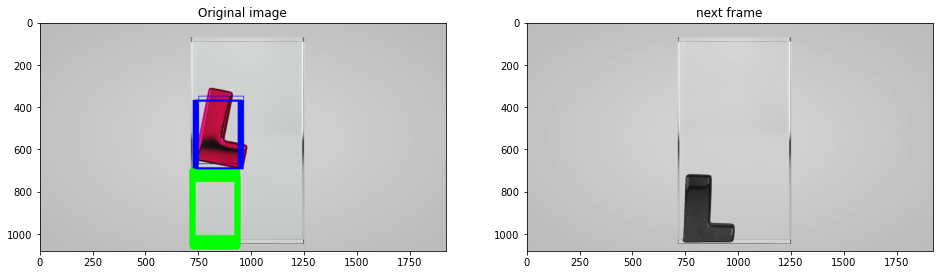

<Figure size 432x288 with 0 Axes>

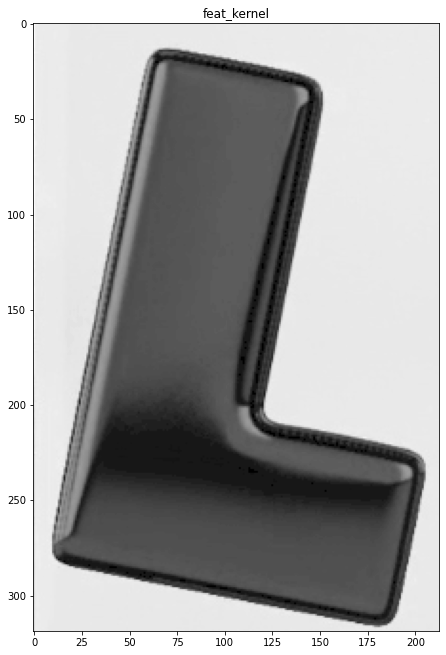

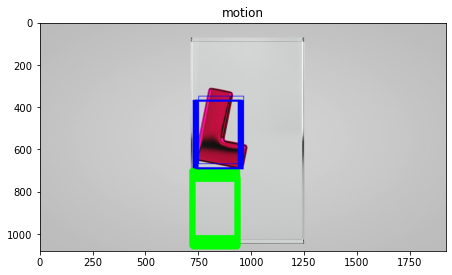

In [39]:
# plt.figure()

# x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

# u = 1
# v = -1

# plt.quiver(x,y,u,v)
# plt.show()
    
plt.figure(figsize =(16,16))

# display original
plt.subplot(1,2,1)
plt.imshow(orig, cmap='gray')
plt.title("Original image")

# display high pass image
plt.subplot(1,2,2)
plt.imshow(tstImg, cmap='gray')
plt.title("next frame")

plt.figure()

plt.figure(figsize =(16,16))
plt.subplot(1,2,1)
plt.imshow(feat_kernel, cmap='gray')
plt.title("feat_kernel")

plt.figure(figsize =(16,16))
plt.subplot(1,2,2)
plt.imshow(matching, cmap='gray')
plt.title("motion")


Here we detect L from original frame in the next frame, and show the detected L in the original. As expected L is detected at the bottom.

1.3 (5 pts) Now try applying your function to estimate the motion from real video. 
Choose one example where it works well and one where it does not. Provide an interpretation of why the algorithm fails.

Solution: This approach will work well, when the camera frame is steady and only a single object is moving. There are no intensity changes, in the picture, or the object cannot be detected well.


1.4 (5 pts) Discuss ways in which this approach could be modified to provide a more robust motion estimate.



### Exercise 2. Motion Gradient Equation (30 pts)

The motion gradient equation relates changes in intensity to changes in motion by assuming constant brightness

$$
\newcommand{\fdxdy}[2]{\frac{\partial #1}{\partial #2}}
\begin{eqnarray*}
\fdxdy{I}{x}\frac{dx}{dt} + 
\fdxdy{I}{y}\frac{dy}{dt} + 
\fdxdy{I}{t} & = & 0\\
I_x u + I_y v + I_t & = & 0
\end{eqnarray*}
$$

$$
\Rightarrow \quad (I_x, I_y) \cdot (u,v) = -I_t
$$

2.1 (5 pts) Define a function $g(x,y,u,v,t)$ that describes the linear motion of a 2D circular Gaussian with a standard deviation of one.  The Gaussian center is defined by $(x_0,y_0)$, and the motion by $(u,v)$.

2.2 (5 pts) Derive the components of the motion gradient equation for this function and show that the equation is satisfied.

2.3 (5 pts) Use your function in 2.1 to construct a discrete $n \times n$ image sequence of a moving Gaussian.  Plot the frames and overlay the motion vector.

2.4 (5 pts) Use this data to show that the discrete version of the motion gradient equation above is approximately correct by calculating the discrete derivatives.  You may need to modify your image sequence parameters in order for this to work.

2.5 (5 pts) Use your method above to obtain a motion constraint equation in two locations so that you can solve for the motion vector $(u,v)$.  Illustrate your results.

2.6 (5 pts) Use your code above to illustrate the apperture problem.  Explain what you needed to do in order to create an effective example.

### Exercise 3. Classification with Neural Networks (20 pts)

3.1 (5 pts) Under what circumstances would the mathematical operation of the first layer of a neural network be similar to a linear dimensionality reduction like principal components?

3.2 (5 pts) When would the first layer of a neural network be more like a linear representation like wavelets or Gabor-like functions learned with statistical techniques?  When would it not be?

3.3 (5 pts) Contrast the non-linearities used in neural networks with approaches in computer vision used to achieve feature invariance.

3.4 (5 pts) Find an application of neural networks to a computer vision problem and describe the network architecture and rationale.

### Exploration (20 pts)

In these problems, you are meant to do creative exploration. Please read the rubric below.  This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project. 

Some other ideas:
- reproduce a figure from the readings
- derive or illustrate equations from the readings
- an exercise from the textbook (with explanation)

The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background.

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|   Element  | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. |
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|


In [ ]:
import cv2
import numpy as np


## here i use the simple concept of opencv contours to detect people walking in an image
## Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity. 
## Contours come handy in shape analysis, finding the size of the object of interest, and object detection
## we break the image into frames, detect the difference between two frames,
## convert this difference to gray scale for easy detection of contours and find the contours and draw a rectangle around them
##

cap = cv2.VideoCapture('cars_2.mp4')
frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))

frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

out = cv2.VideoWriter("output.mp4", fourcc, 5.0, (1280,720))

ret, frame1 = cap.read()
ret, frame2 = cap.read()
print(frame1.shape)
while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2) # finds the difference between 1st and 2nd frame    
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) # easier to find contors in gray scale
    blur = cv2.GaussianBlur(gray, (5,5), 0) # blurring the image
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY) 
    dilated = cv2.dilate(thresh, None, iterations=3)# filling up holes
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # finding contours

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 900:
            continue
        cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 3)
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)

    image = cv2.resize(frame1, (1280,720))
    out.write(image)
#     cv2.imshow("feed", frame1)
    frame1 = frame2
    ret, frame2 = cap.read()

    if cv2.waitKey(40) == 27:
        break

cv2.destroyAllWindows()
cap.release()
out.release()

Text(0.5, 1.0, 'people detected')

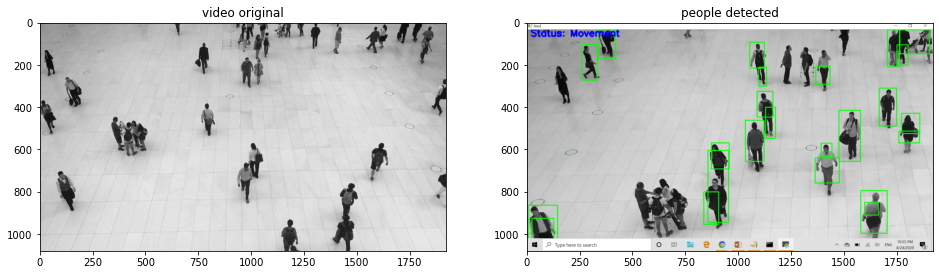

In [5]:
plt.figure(figsize =(16,16))

# display original
plt.subplot(1,2,1)
plt.imshow(frame1, cmap='gray')
plt.title("video original")

detected = cv2.imread("detected.png");

plt.subplot(1,2,2)
plt.imshow(detected, cmap='gray')
plt.title("people detected")

# plt.figure()

# plt.figure(figsize =(16,16))
# plt.subplot(1,2,1)
# plt.imshow(feat_kernel, cmap='gray')
# plt.title("feat_kernel")

# plt.figure(figsize =(16,16))
# plt.subplot(1,2,2)
# plt.imshow(matching, cmap='gray')
# plt.title("motion")

if we use a blurred crowd, the algorithem above can still detect movements , but the person's boundaries tend to be lost.

Text(0.5, 1.0, 'people detected')

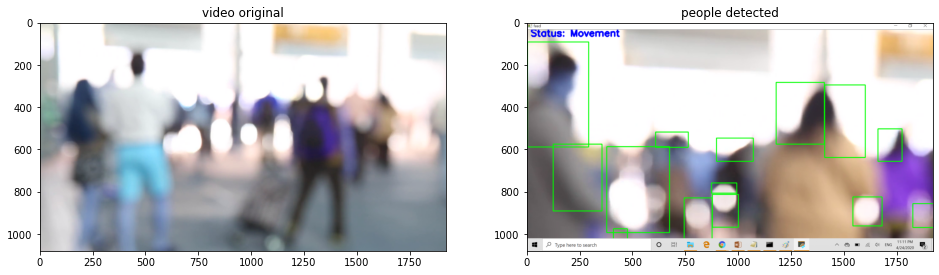

In [6]:
plt.figure(figsize =(16,16))

# display original
plt.subplot(1,2,1)
plt.imshow(frame1, cmap='gray')
plt.title("video original")

detected = cv2.imread("detected2.png");

plt.subplot(1,2,2)
plt.imshow(detected, cmap='gray')
plt.title("people detected")

# plt.figure()

# plt.figure(figsize =(16,16))
# plt.subplot(1,2,1)
# plt.imshow(feat_kernel, cmap='gray')
# plt.title("feat_kernel")

# plt.figure(figsize =(16,16))
# plt.subplot(1,2,2)
# plt.imshow(matching, cmap='gray')
# plt.title("motion")